<a href="https://colab.research.google.com/github/jouherdauf/Rossman-Sales-Prediction-Regression/blob/main/Rossmonn_Retail_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann**

##### **Project Type**    - Machine Learning/Regression/Supervised
##### **Contribution**    - Individual
##### **Name-** Jouher Lais Khan

### **Github Link -** https://github.com/jouherdauf/Rossman-Sales-Prediction-Regression

# **Problem Description**
**Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.**

##Business Problem
 Sales forecasting refers to the process of estimating demand for or sales of a particular product over a specific period of time.
 This project involves solving a real-world business problem of sales forecasting and building up a machine learning model for the same.

####Approach
* Business Problem
* Data Collection and Preprocessing
      - Importing important libraries and modules
      - Data Cleaning
      - Missing Data Handling
      - Merging the Datasets
* Exploratory Data Analysis
      - Categorical Features
      - Continuous Features
      - EDA Conclusion
* Feature Selection and Outlier Detection
      - Feature Engineering
      - Outlier Detection and Treatment
* Modeling
      - Train Test Split
      - Linear Regression(OLS)
      - Lasso,Ridge,Elastic Net with Hyperparameter Tuning
      - Baseline Model - Decision Tree
      - Random Forest Model
* Model Performance and Evaluation
        - Visualizing Model Performances
        - Random Forest vs Baseline Model
        - Random Forest Tuned vs Baseline and Random Forest Models

* Conclusion and Recommendations


In [280]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [281]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Reading**


In [282]:
# creating dataframes and store csv data
sales =pd.read_csv('/content/drive/My Drive/Rossmann-Sales-Prediction/Rossmann Stores Data.csv')
stores =pd.read_csv('/content/drive/My Drive/Rossmann-Sales-Prediction/store.csv')

# **Data Inspection**


Two datasets are given: store data and sales data. These two datasets should be merged after data cleaning and 'Sales' will be taken as the target feature.

In [283]:
# exploring the head of the sales dataframe
sales.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [284]:
# exploring the head of the store dataframe
stores.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

In [285]:
# Dataset Rows & Columns count of sales
print(f'sales - Rows:{len(sales.axes[0])},Columns:{len(sales.axes[1])}')

sales - Rows:1017209,Columns:9


In [286]:
# Dataset Rows & Columns count of stores
print(f'stores - Rows:{len(stores.axes[0])},Columns:{len(stores.axes[1])}')

stores - Rows:1115,Columns:10


In [287]:
 sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [288]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


# **Data Cleaning**

### **Checking for duplicates values**

In [289]:
# Dataset Duplicate Value Count
stores[stores.duplicated()].shape # checking the  number of duplicate rows

(0, 10)

### **Checking for null values**

In [290]:
# Missing Values/Null Values Count
stores.isnull().sum().sort_values(ascending = False)

Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
CompetitionDistance            3
Store                          0
StoreType                      0
Assortment                     0
Promo2                         0
dtype: int64

 Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenSinceMonth,CompetitionOpenSinceYear have very high number of null values so we will remove these features.CompetitionDistance have just 3 null values.

In [291]:
# Visualizing the missing values
# remove features
stores = stores.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)

CompetitionDistance is the distance in meters to the nearest competitor store.Let's first have a look at its distribution

Text(0.5, 1.0, 'Distributin of Store Competition Distance')

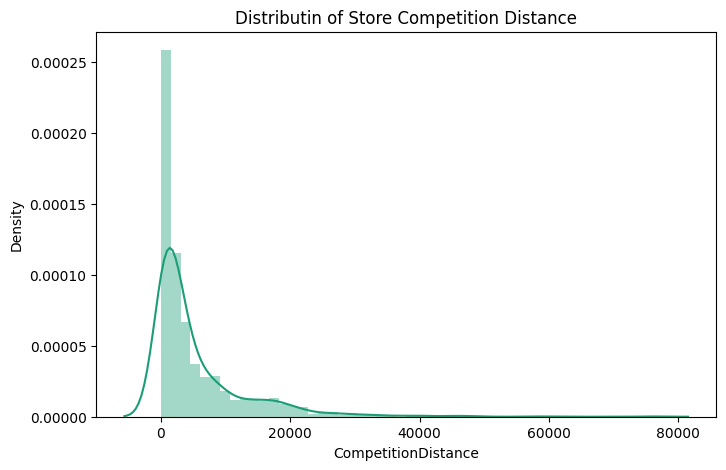

In [292]:
sns.distplot(stores.CompetitionDistance.dropna())
plt.title("Distributin of Store Competition Distance")

Distribution of Competition Distance is positively skewed,so we will replace missing values with median.

In [293]:
# replace missing values in CompetitionDistance with median for the store dataset
stores.CompetitionDistance.fillna(stores.CompetitionDistance.median(), inplace=True)

In [294]:
sales.isnull().sum().sort_values(ascending = False)

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [295]:
#Merging the dataset
df = pd.merge(stores, sales, on='Store', how='inner')

## **Data Description**

* **Id** - an Id that represents a (Store, Date) duple within the set
*  **Store** - a unique Id for each store(Integer)
*  **Sales** - the turnover for any given day (Dependent Variable)
* **Customers** - the number of customers on a given day
* **Open** - an indicator for whether the store was open: 0 = closed, 1 = open
* **StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* **SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools
* **StoreType** - differentiates between 4 different store models: a, b, c, d
* **Assortment** - describes an assortment level: a = basic, b = extra, c = extended. An assortment strategy in retailing involves the number and type of products that stores display for purchase by consumers.
* **CompetitionDistance** - distance in meters to the nearest competitor store
* **CompetitionOpenSince**[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* **Promo** - indicates whether a store is running a promo on that day
* **Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* **Promo2Since**[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* **PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

### **Unique Values of features**

In [296]:
# Check Unique Values for each variable.
lengths = sorted([len(s) for s in sorted(df)])
space = lengths[-1]*' '
for i in sorted(df):
  if df[i].nunique() <= 12:
    print(f'{i} {space[len(i):20]}{df[i].nunique()} {df[i].unique()}')

Assortment          3 ['a' 'c' 'b']
DayOfWeek           7 [5 4 3 2 1 7 6]
Open                2 [1 0]
Promo               2 [1 0]
Promo2              2 [0 1]
SchoolHoliday       2 [1 0]
StateHoliday        5 ['0' 'a' 'b' 'c' 0]
StoreType           4 ['c' 'a' 'd' 'b']


We can see that unique values of StateHoliday are not in proper datatype and same values are repeated in different datatypes.

In [297]:
#converting StateHoliday 0 values into string.
df.loc[df['StateHoliday'] == 0,'StateHoliday'] = '0'
df = df.astype({'StateHoliday':'string'})

### **Removing insignificant rows and columns**
Since when store is closed there will be no sales,so we will drop rows where store is closed and also Open column.

In [298]:
#remove rows when store is closed ie 0 value
df.drop(df[df['Open'] == 0].index,inplace = True)
df.drop('Open',axis =1, inplace =True)

From data description we know that most of the store are closed in State Holidays.</br>
Lets see what percentage of state holidays are left after dropping rows where store are closed.

In [299]:
#checking percentage category of State Holiday of type a,b,c.
(df.loc[(df['StateHoliday'] == 'a')|(df['StateHoliday'] == 'b') | (df['StateHoliday'] == 'c'),'StateHoliday'].count()/df['StateHoliday'].count())*100

0.10776985096969181

State holidays categorized as a, b, and c account for a mere 0.1% of all state-related entries. Hence, we have decided to eliminate state holidays from consideration.

In [300]:
df.drop('StateHoliday',axis = 1,inplace =True)


### **Adding important columns.**

In [301]:
# extract year, month, day  of year from "Date"
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['WeekOfYear'] = df['Date'].dt.isocalendar().week.astype("int64")



# **Data Wrangling**

In [302]:
stores = df.groupby(['Store'],as_index =False)['Sales'].mean()

<Axes: xlabel='Store', ylabel='Sales'>

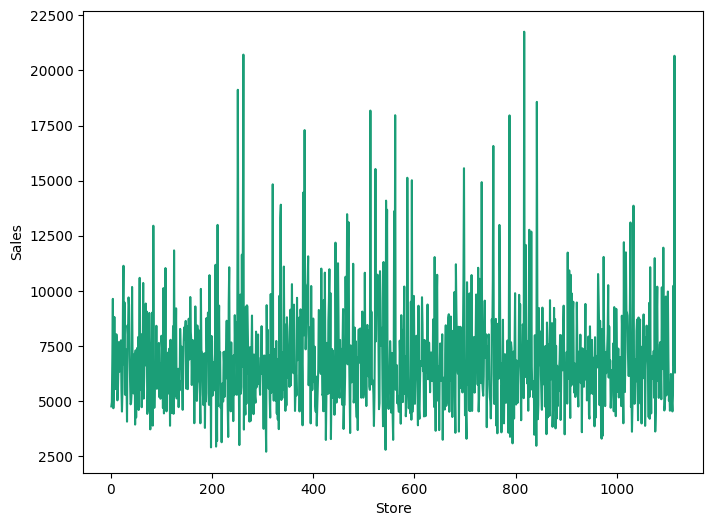

In [303]:
plt.figure(figsize = (8,6))
sns.lineplot(x="Store", y="Sales",data= stores,errorbar = None)

The line plot suggests that there is no significant influence on sales as the number of stores increases, with most stores having average sales ranging from 5000 to 10000, aside from a few outliers. Consequently, store number is not a crucial factor in sales analysis.So,we will drop the Store Column.

In [304]:
df.drop('Store',axis=1,inplace = True)

Lets check  School Holiday increase the sales or not.

<Axes: xlabel='SchoolHoliday', ylabel='Sales'>

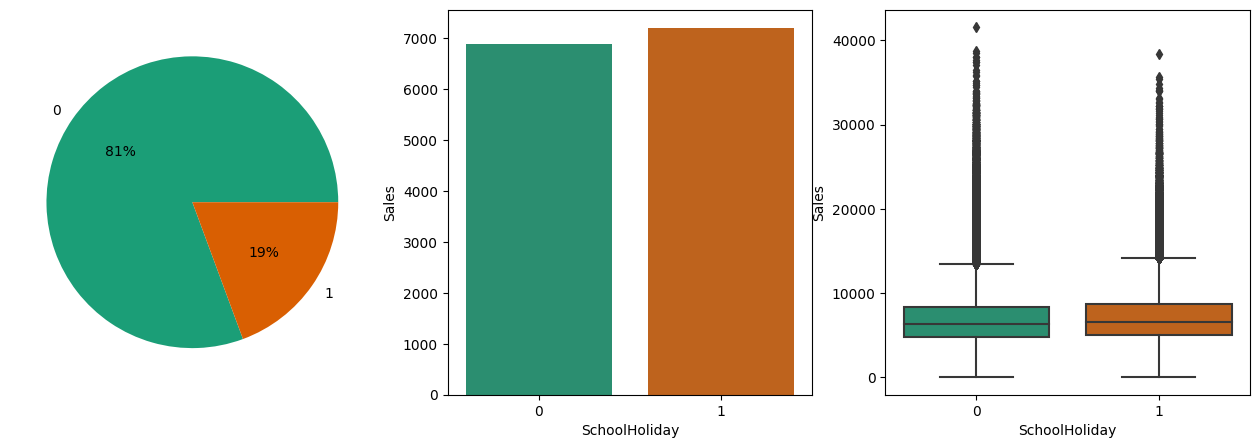

In [305]:
ab = df.groupby(['SchoolHoliday'],as_index =False)['Sales'].count()
fig, axes = plt.subplots(1,3, figsize=(16,5))
axes[0].pie(ab['Sales'],labels=ab['SchoolHoliday'],autopct = '%.0f%%')
sns.barplot(ax =axes[1] ,x="SchoolHoliday", y="Sales",data= df,errorbar = None)
sns.boxplot(ax =axes[2] ,x = 'SchoolHoliday', y = 'Sales', data = df)

Despite school holidays comprising only 19% of the total data points, the average sales during school holidays surpass those during non-school holidays.

In [306]:
Categorical_feature = df.describe(include=['object','category']).columns

<Axes: xlabel='StoreType', ylabel='Sales'>

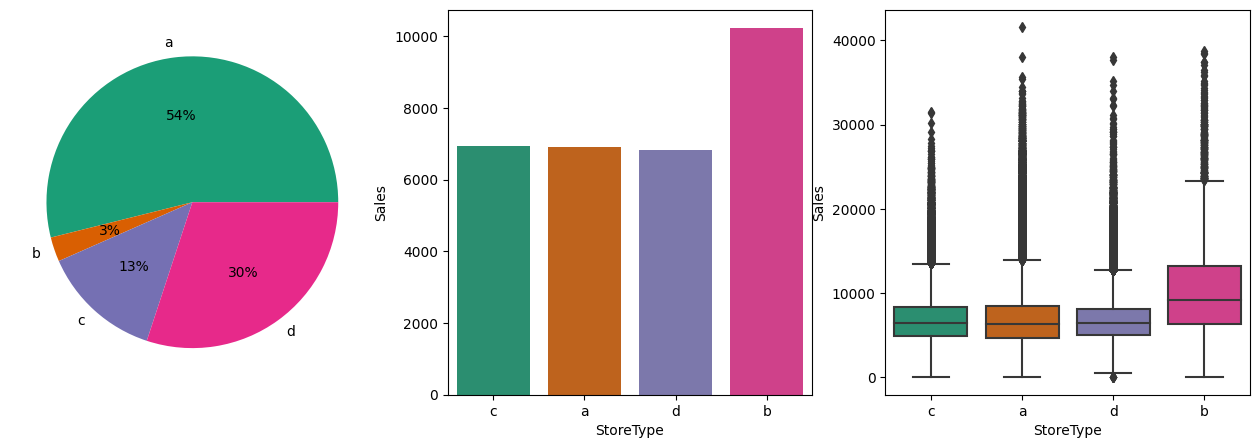

In [307]:
ab = df.groupby(['StoreType'],as_index =False)['Sales'].sum()
fig, axes = plt.subplots(1,3, figsize=(16,5))
axes[0].pie(ab['Sales'],labels=ab['StoreType'],autopct = '%.0f%%')
sns.barplot(ax =axes[1] ,x="StoreType", y="Sales",data= df,errorbar = None)
sns.boxplot(ax =axes[2] ,x = 'StoreType', y = 'Sales', data = df)

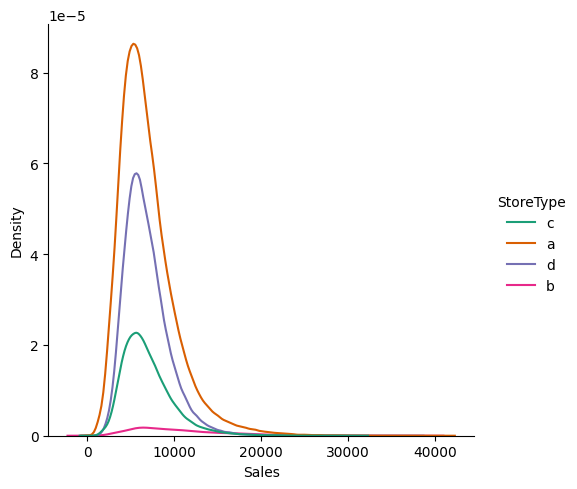

In [308]:
sns.displot(data=df, x="Sales", hue="StoreType",kind ='kde')

In [309]:
(df.loc[df['StoreType'] =='b','StoreType'].count()/df['StoreType'].count())*100

1.843101308397048

Despite only 1.84% of Store Type, store type b exhibits the highest average sales and customer numbers, indicating a stronger preference for this store type among customers.

In [310]:
stores = df.groupby(['StoreType'],as_index =False)['Sales'].sum()

<Axes: xlabel='Assortment', ylabel='Sales'>

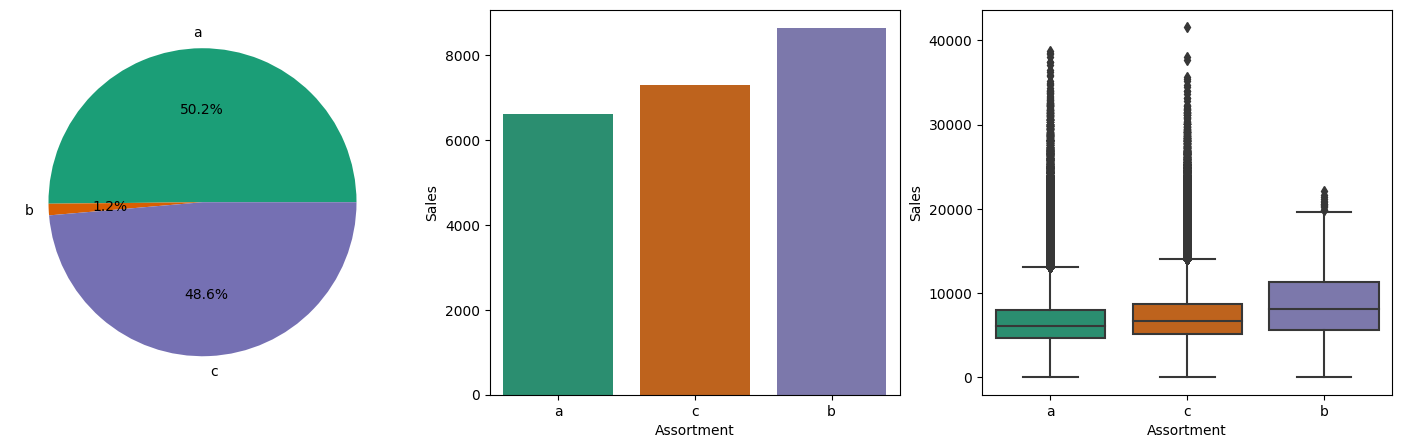

In [311]:
ab = df.groupby(['Assortment'],as_index =False)['Sales'].sum()
fig, axes = plt.subplots(1,3, figsize=(18,5))
axes[0].pie(ab['Sales'],labels=ab['Assortment'],autopct = '%.1f%%')
sns.barplot(ax =axes[1] ,x="Assortment", y="Sales",data= df,errorbar = None)
sns.boxplot(ax =axes[2] ,x = 'Assortment', y = 'Sales', data = df)

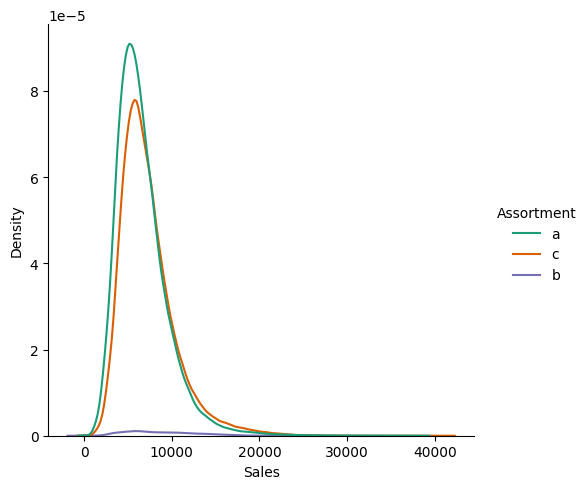

In [312]:
# Dependent variable 'Price'
sns.displot(data=df, x="Sales", hue="Assortment",kind ='kde')

In [313]:
(df.loc[df['Assortment'] =='b','Assortment'].count()/df['Assortment'].count())*100

0.9725340836957242

Despite only 0.97 % of the Assortment,Assortment b stands out with the highest average sales and customer counts, suggesting a high demand for this assortment. Now, let's examine the sales figures for each assortment across different store types.

Text(0.5, 1.0, 'Number of Sales for each Assortment per Store Type')

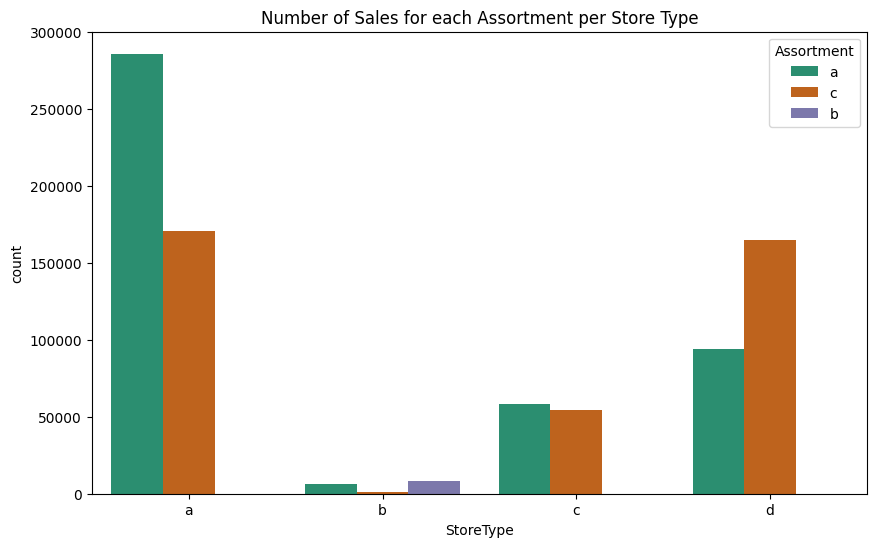

In [314]:
plt.figure(figsize=(10, 6))
sns.countplot(x='StoreType', hue='Assortment', order=sorted(df['StoreType'].unique().tolist()), data=df, palette=sns.color_palette(n_colors=3))
plt.title("Number of Sales for each Assortment per Store Type")

Exclusively, store type b offers assortment b, and it outperforms assortment a in terms of sales.

Let's see wether promo1 and promo2 has any significance in sales determination.




<Axes: xlabel='Promo', ylabel='Sales'>

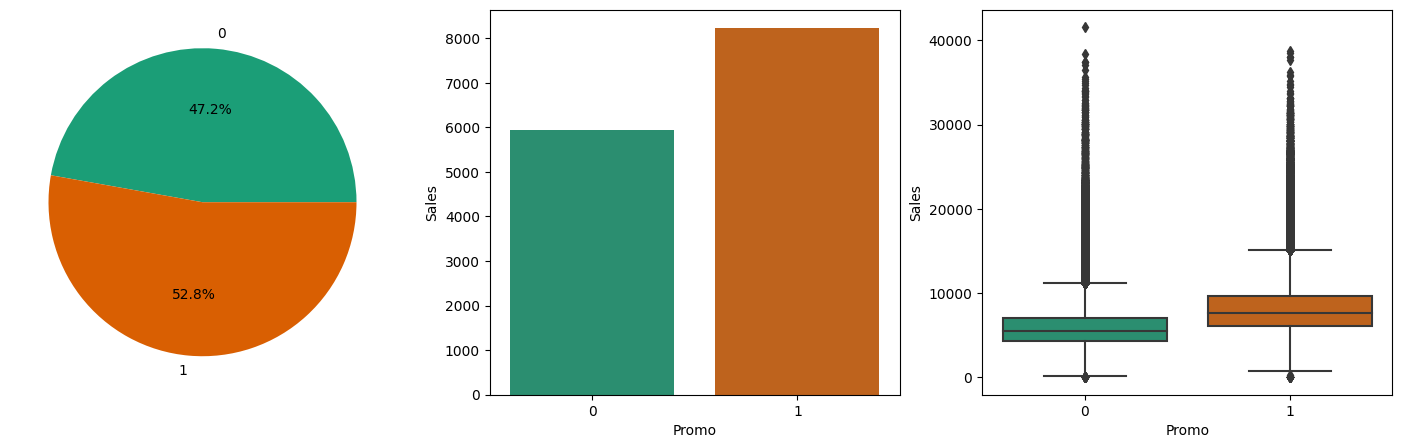

In [315]:
ab = df.groupby(['Promo'],as_index =False)['Sales'].sum()
fig, axes = plt.subplots(1,3, figsize=(18,5))
axes[0].pie(ab['Sales'],labels=ab['Promo'],autopct = '%.1f%%')
sns.barplot(ax =axes[1] ,x="Promo", y="Sales",data= df,errorbar = None)
sns.boxplot(ax =axes[2] ,x = 'Promo', y = 'Sales', data = df)

The overall sales are higher when there is no promotion,but avg sales is significantly higher,when promotion happens.</br>
Also promo(0) and promo(1) contains high number of outliers,mostly below lower control limit.

<Axes: xlabel='Promo2', ylabel='Sales'>

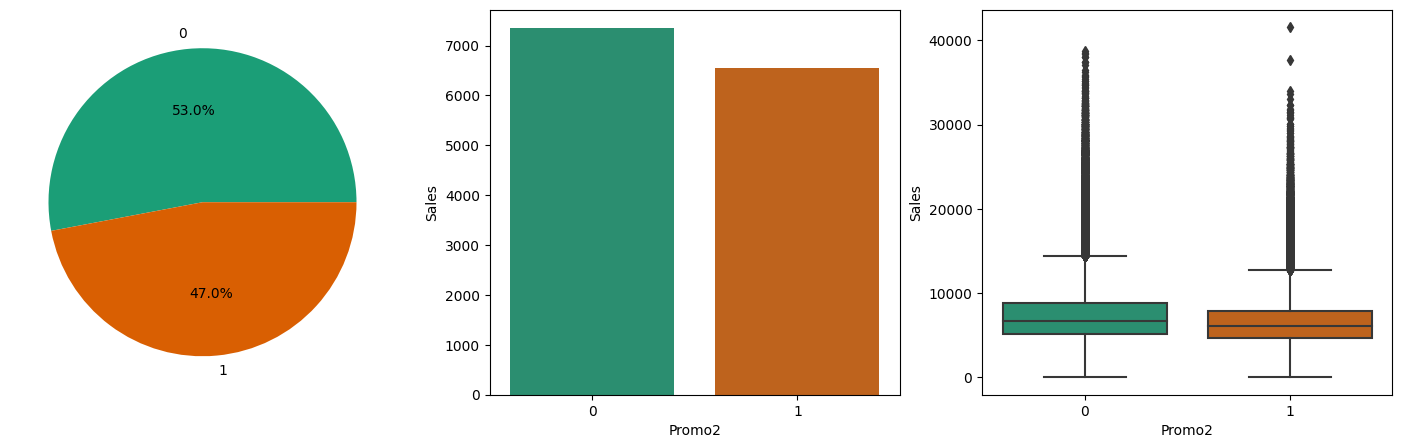

In [316]:
ab = df.groupby(['Promo2'],as_index =False)['Sales'].sum()
fig, axes = plt.subplots(1,3, figsize=(18,5))
axes[0].pie(ab['Sales'],labels=ab['Promo2'],autopct = '%.1f%%')
sns.barplot(ax =axes[1] ,x="Promo2", y="Sales",data= df,errorbar = None)
sns.boxplot(ax =axes[2] ,x = 'Promo2', y = 'Sales', data = df)

There is no significance when promotion 2 happens,infact avg sales are less when promotion 2 happens.</br>
Also promo(0) and promo(1) contains high number of outliers,mostly below lower control limit.

Next, let's investigate how various continuous features, such as month, year, week, etc., influence sales and customer metrics.

<Axes: xlabel='Month', ylabel='Sales'>

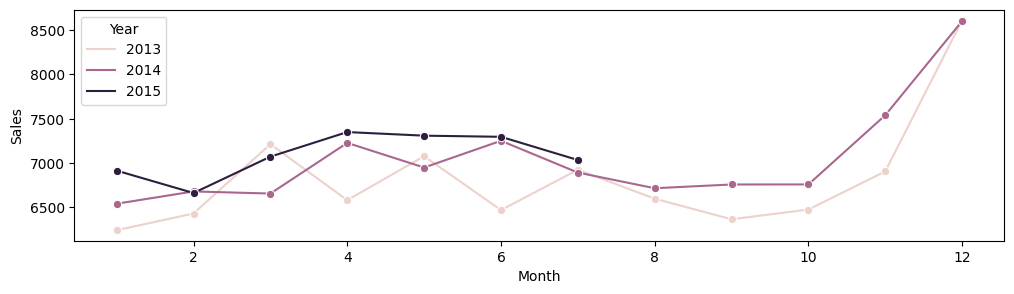

In [317]:
# line graph of monthly sales over years
plt.figure(figsize=(12,3))
sns.lineplot(x="Month" ,y = "Sales" , data=df,hue ='Year',errorbar=None,marker='o',color ='deepskyblue')

In [401]:
# line graph of monthly customers over years
plt.figure(figsize=(12,3))
sns.lineplot(x="Month" ,y = "Customers" , data=df,hue ='Year',errorbar=None,marker='o',color ='deepskyblue')

ValueError: ignored

<Figure size 1200x300 with 0 Axes>

In [ ]:
# line graph of weekly sales over years
plt.figure(figsize=(12,3))
sns.lineplot(x="WeekOfYear" ,y = "Sales" , data=df,hue ='Year',errorbar=None,marker='o',color ='deepskyblue')

In [ ]:
# line graph of weekly customers over years
plt.figure(figsize=(12,3))
sns.lineplot(x="WeekOfYear" ,y = "Customers" , data=df,hue ='Year',errorbar=None,marker='o',color ='deepskyblue')

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(16,5))
sns.scatterplot(ax =axes[0],x= 'Customers',y='Sales', data=df)
sns.boxplot(ax =axes[1] ,x = 'Sales', data = df)

We can see Sales and Customers have high positive Correlation from the scatter plot.

Lets check weather where sales is 0 customer is also 0.

In [ ]:
print('Unique Values of Customers where Sales is 0:' ,df.loc[df['Sales'] == 0,'Customers'].unique())
print('Count of Unique Values of Customers where Sales is 0:' ,df.loc[df['Sales'] == 0,'Customers'].count())

There are rows where sales is 0 but customers are not,this is not possible.

There are only 54 rows where sales is 0,so we will drop Sales rows where sales is equal to 0.

In [ ]:
df.drop(df[df['Sales'] == 0].index,inplace =True)


In [ ]:
fig, axes = plt.subplots(1,2, figsize=(16,5))
sns.scatterplot(ax =axes[0],x= 'CompetitionDistance',y='Sales', data=df.groupby(['CompetitionDistance'],as_index =False)['Sales'].mean())
sns.boxplot(ax =axes[1] ,x = 'CompetitionDistance', data = df)

In cases where there is less competition distance, it appears that sales values tend to be higher. This might be attributed to the possibility that in areas with higher demand, multiple stores are situated.

There are very few stores where competition distance is higher than 40000 meters.

In [ ]:
numerical_feature = df.describe().columns
numerical_feature

In [ ]:
# generate a correlation matrix using all features in the dataframe
corr_mat = df.corr().abs()

# plot heatmap using correlation matrix
fig, axes = plt.subplots(figsize=(12, 12))
sns.heatmap(corr_mat, annot = True, fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True, cmap='Blues');

Month has 0.96 correlation with week of year,this is beacuse weeks of year is like subset of months of year.



## Handling Multicollinearity
Lets find out the VIF of all numerical features except 'Sales' in order to remove highly correlated features. Features having VIF greater than 10 should be eliminated.

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
#Calculating Multicollinearity of independent variables
calc_vif(df[[i for i in df.describe().columns if i not in ['Sales',]]])

Multicollinearity of greater 10 than is not considered good, in the dataset only year has Multicollinearity of 21.

So,we will drop the year column

In [ ]:
#dropping the Year column
df.drop('Year',axis = 1, inplace =True)

In [ ]:
#Calculating Multicollinearity of independent variables
calc_vif(df[[i for i in df.describe().columns if i not in ['Sales',]]])

## **Features Distribution**

Lets check out the distribution of all the features.

In [ ]:
fig, axes = plt.subplots(nrows = 5, ncols = 2)
axes = axes.flatten()
fig.set_size_inches(15, 25)

for ax, col in zip(axes,df.describe().columns):
  sns.distplot(df[col], ax = ax, color='purple',hist_kws={"edgecolor": 'black'})
  ax.set_title(col)




Distribution of sales, customer, competition distance are positively skewed.</br>
Lets check the variation in sales with the numerical features.




In [ ]:
numeric_features = ['Customers','CompetitionDistance']

In [ ]:
for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Sales']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Sales')
    ax.set_title('Sales vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Sales'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

The correlation between sales and customers appears to be nearly linear, indicating</br> that as the number of customers increases, sales tend to increase as well.

Sales exhibit a very slight decline with an increase in competition distance.



## **Handling Outliers**

In [ ]:
def outlier_boundaries(dataframe, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    return fence_high,fence_low
def get_outlier_count_and_percentage(dataframe, column):
  upper_outlier_bound, lower_outlier_bound = outlier_boundaries(dataframe, column)
  count = 0
  for value in dataframe[column]:
    if value >  upper_outlier_bound or value < lower_outlier_bound:
      count += 1
  percentage = round(count/dataframe.shape[0]*100, 2)

  return (count, percentage)

Checking Outliers of sales

In [ ]:
sns.boxplot(df['Sales'])
count, perc = get_outlier_count_and_percentage(df, 'Sales')
print(f"Outliers in Sales : {count} ({perc}%)")

In [ ]:
# count and percentage of data of different values
for limit in (19000,23000,26000):
  count = df[df['Sales'] > limit].shape[0]
  perc = round(count/df.shape[0]*100, 2)
  print(f"Count & percentage of data above {limit} : {count} ({perc}%)")

Sales has 3.64 %  outliers and all outliers are above upper limit.</br>
Above 19000 there is 0.68% outliers,so we will remove these outliers.</br>
Eliminating all outliers may cause overfitting so we will remove only extreme outliers

In [ ]:
#removing Sales values greater than 45000
df.drop(df[df['Sales'] >= 19000].index,inplace =True)

Checking Outliers of Competition Distance

In [ ]:
sns.boxplot(df['CompetitionDistance'])
count, perc = get_outlier_count_and_percentage(df, 'CompetitionDistance')
print(f"Outliers in competition distance : {count} ({perc}%)")

In [ ]:
# count and percentage of data of CompetitionDistance values
for limit in (30000, 40000,45000):
  count = df[df['CompetitionDistance'] > limit].shape[0]
  perc = round(count/df.shape[0]*100, 2)
  print(f"Count & percentage of data above {limit} : {count} ({perc}%)")

Outliers above 40000 are just 0.78 % of the dataset so we will remove these outliers.

In [ ]:
#removing competition distance values greater than 45000
df.drop(df[df['CompetitionDistance'] >= 40000].index,inplace =True)

In [ ]:
sns.boxplot(df['Customers'])
count, perc = get_outlier_count_and_percentage(df, 'Customers')
print(f"Outliers in Customers : {count} ({perc}%)")

In [ ]:
# count and percentage of data of Customers values
for limit in [(4,4000),(9,3500),(9,2800)]:
  count = df[(df['Customers'] > limit[1]) | (df['Customers'] < limit[0])].shape[0]
  perc = round(count/df.shape[0]*100, 2)
  print(f"Count & percentage of data above {limit[1]} & below {limit[0]}: {count} ({perc}%)")

Outliers above 2800 is just 0.36% of the dataset,so we will remove these outliers

In [ ]:
# removing competition Customers greater than 45000
df.drop(df[(df['Customers'] > 2800) | (df['Customers'] < 9)].index,inplace =True)

## **Checking Outliers of Categoricals Features**

We can only check outliers of categoricals features by separate categories and check it with respect to sales.

In [ ]:
categories_features = ['Assortment','StoreType']

In [ ]:
for col in categories_features:
  fig, axes = plt.subplots(1,len(df[col].unique()), figsize=(18,6))
  plt.suptitle(col)
  color_code = ['#451952','#053B50','#96C291','#252B48']
  for i,cate in enumerate(df[col].unique()):
     az = df[df[col] == cate]
     count, perc = get_outlier_count_and_percentage(az,'Sales')
     az.plot.scatter(ax = axes[i],x= 'Customers',y='Sales',c=color_code[i],title = f'{cate}: Outliers :{count}({perc}%)')


We will consider outliers below 5%  as tolerate limit,as we cannot remove all the outliers.</br> From the above scatter plot there are 1 category which have greter 5% outliers.</br>
<ol>
<li>Assortmet(Category:b) = 6.93%</li>
</ol>

So,we will try to remove these outliers




In [ ]:
#cheking the boxplot of Assortment of category b
sns.boxplot(df.loc[df['Assortment'] == 'b',['Sales']])
plt.title('Assortment(Category:b)')

From the box plot we can see Assortment of category b has upper control limit around 16000.</br>
We will remove extreme outliers whose  sales are greater than 17000.

In [ ]:
df.drop(df.loc[(df['Assortment'] == 'b') & (df['Sales'] >= 17000)].index,inplace =True)

In [ ]:
sns.boxplot(df.loc[df['Assortment'] == 'b',['Sales']])
plt.title('Assortment(Category:b)')

# **Feature Transformation**

From the distribution feature section we have seen that distibution of sales,customers,competition distance are positively skewed so we will apply feature transformation on them.We also know that these features does not contain 0 values,after data cleaning.</br>

So we will apply log transform to these features.

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(df['Sales'],color="y")

In [ ]:
# square root transformation of sales, customers, competition open number of months and promo 2 number of weeks
df['Sales'] = np.log10(df['Sales'])
plt.figure(figsize=(7,7))
sns.distplot(df['Sales'],color="y")

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(df['Customers'],color="g")

In [ ]:
# square root transformation of sales, customers, competition open number of months and promo 2 number of weeks
df['Customers'] = np.log10(df['Customers'])
plt.figure(figsize=(7,7))
sns.distplot(df['Customers'],color="g")

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(df['CompetitionDistance'],color="y")

In [ ]:
# square root transformation of sales, customers, competition open number of months and promo 2 number of weeks
df['CompetitionDistance'] = np.log10(df['CompetitionDistance'])
plt.figure(figsize=(7,7))
sns.distplot(df['CompetitionDistance'],color="y")

Customers,Sales transfomation are nearly normal and skewness are mostly removed.</br>
CompetitionDistance skewness are reomved but transformation is distorted normal distribution.

# **Categorical Feature Encoding**


In [ ]:
#creating datframe copy
df1 = df.copy()

In [ ]:
# One hot encoding
df1 = pd.get_dummies(df, columns=["StoreType","Assortment"], prefix=["Store","Assort"])

In [ ]:
#Final features
feat = ['CompetitionDistance','Promo2','DayOfWeek','Customers','Promo','SchoolHoliday','Day','WeekOfYear','Store_a','Store_b','Store_c','Store_d','Assort_a','Assort_b','Assort_c']

# **Modelling**
## **Train-Test Split**
First, we will separate input features and target feature.

In [ ]:
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# independant features (input)
X = df1[feat].apply(zscore)

# dependant feature (target)
y = df1['Sales']

 splitting them into training and test data with 20% test data

In [ ]:
# split the datasets to training and test data
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0)

### **Creating dataframe for different model evaluation**

In [ ]:
dtypes = np.dtype(
    [
        ('Regression_Model', str),
        ('Train_MSE', float),
        ('Train_RMSE',float),
        ('Train_R2', float),
        ('Train_Adjusted_R2',float),
        ('Test_MSE',float),
        ('Test_RMSE',float),
        ('Test_R2', float),
        ('Test_Adjusted_R2',float),
    ]
)
model_accuracy = pd.DataFrame(np.empty(0, dtype=dtypes))

In [ ]:

data = {
  "Sales": y_test,
}
#load data into a DataFrame object:
y_actual = pd.DataFrame(data)
SalesPredictModels =  pd.merge(df,y_actual , left_index=True, right_index=True)

## **Model Training**
### **Linear Regression**

In [ ]:
# train data with linear regression
reg = LinearRegression().fit(X_train, y_train)

# predict the train  data
y_pred_train = reg.predict(X_train)
r2_train = r2_score(10**(y_train), 10**(y_pred_train))
MSE_train  = mean_squared_error(10**(y_train), 10**(y_pred_train))
RMSE_train = np.sqrt(MSE_train)
Train_Adjusted_R2 = 1-(1-r2_score(10**(y_train), 10**(y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))

# predict the test data
y_pred_test = reg.predict(X_test)
MSE_test  = mean_squared_error(10**(y_test), 10**(y_pred_test))
RMSE_test = np.sqrt(MSE_test)
r2_test = r2_score(10**(y_test), 10**(y_pred_test))
Test_Adjusted_R2 = 1-(1-r2_score(10**(y_test), 10**(y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

# print the results of model evaluation
print('Test-train Data size')
print(f'Train Size : {X_train.shape}')
print(f'Test Size  : {X_test.shape}')
print(f'Number of Coefficient: {len(reg.coef_)}\n')

print('Training Data')
print(f'MSE         : {MSE_train}')
print(f'RMSE        : {RMSE_train}')
print(f'R2          : {r2_train}')
print(f'Adjusted R2 : {Train_Adjusted_R2}\n')

print('Testing Data')
print(f'MSE         : {MSE_test}')
print(f'RMSE        : {RMSE_test}')
print(f'R2          : {r2_test}')
print(f'Adjusted R2 : {Test_Adjusted_R2}\n')

In [ ]:
model_accuracy.loc[len(model_accuracy.index)] = ['Linear_Regression',MSE_train,RMSE_train,r2_train,Train_Adjusted_R2,MSE_test,RMSE_test,r2_test,Test_Adjusted_R2]

In [ ]:
 # Draw the density plot
ab = {'Real':10**(np.array(y_test)),'Predicted' :10**(y_pred_test)}
sns.displot(ab,kde = True)

# Plot formatting
plt.legend(prop={'size': 16}, )
plt.title('Density Plot with  Real and Predicted Data')
plt.xlabel('Sales')
plt.ylabel('Density')

In [ ]:
# linear regression feature importance
importance = reg.coef_

# plot feature importance
ax = plt.bar([x for x in range(len(importance))], importance)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], feat,rotation=90)
plt.show()

In [ ]:
SalesPredictModels['y_pred_rdf'] = y_pred_rdf_test
xy = SalesPredictModels[['Promo','StoreType','Assortment','Sales_x','y_pred_rdf','WeekOfYear','DayOfWeek']].groupby(['Assortment','Promo','StoreType','WeekOfYear','DayOfWeek'],as_index = False).mean().reset_index()
plt.figure(figsize = (18,6))
sns.lineplot(x= 'index',y=10**xy['y_pred_rdf'], data=xy,errorbar=None)
sns.lineplot(x= 'index',y=10**xy['Sales_x'], data=xy,errorbar=None)
plt.legend(["Predicted","Actual"])
plt.ylabel('Sales')
plt.xlabel('Group by Assortment,Promo,StoreType,WeekOfYear,DayOfWeek')
plt.show()

### **Lasso Regression with Hyperparameter Tuning**

In [ ]:
# train data with lasso regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-8,1e-5,1e-2,1e-1,1,2,3,5,10,20,30]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

In [ ]:

# predict the train  data and  print the best parameter values and negative mean squared error
y_pred_lasso_train = lasso_regressor.predict(X_train)
MSE_train  = mean_squared_error(10**(y_train), 10**(y_pred_lasso_train))
RMSE_train = np.sqrt(MSE_train)
r2_train = r2_score(10**(y_train), 10**(y_pred_lasso_train))
Train_Adjusted_R2 = 1-(1-r2_score(10**(y_train), 10**(y_pred_lasso_train)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
#print best parameter coefficient
coefs = lasso_regressor.best_estimator_
print(f'Best Parameter Coefficients : {coefs.coef_}\n')


print('Training Data')
print(f'MSE : {MSE_train}')
print(f'RMSE : {RMSE_train}')
print(f'R2 : {r2_train}')
print(f'Adjusted R2 : {Train_Adjusted_R2}\n')

# predict the test  data and  print the best parameter values and negative mean squared error
y_pred_lasso_test = lasso_regressor.predict(X_test)
MSE_test  = mean_squared_error(10**(y_test), 10**(y_pred_lasso_test))
RMSE_test = np.sqrt(MSE_test)
r2_test = r2_score(10**(y_test),10**(y_pred_lasso_test))
Test_Adjusted_R2 = 1-(1-r2_score(10**(y_test), 10**(y_pred_lasso_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Testing Data')
print(f'MSE : {MSE_test}')
print(f'RMSE : {RMSE_test}')
print(f'R2 : {r2_test}')
print(f'Adjusted R2 : {Test_Adjusted_R2}\n')

In [ ]:
model_accuracy.loc[len(model_accuracy.index)] = ['Lasso_Regression',MSE_train,RMSE_train,r2_train,Train_Adjusted_R2,MSE_test,RMSE_test,r2_test,Test_Adjusted_R2]

In [ ]:
 # Draw the density plot
ab = {'Real':10**(np.array(y_test)),'Predicted' :10**(y_pred_lasso_test)}
sns.displot(ab,kde = True)

# Plot formatting
plt.legend(prop={'size': 16})
plt.title('Density Plot with  Real and Predicted Data')
plt.xlabel('Sales')
plt.ylabel('Density')

In [ ]:
# linear regression feature importance
# get importance
importance = coefs.coef_
# summarize feature importance
# plot feature importance
ax = plt.bar([x for x in range(len(importance))], importance)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], feat,rotation=90)
plt.show()

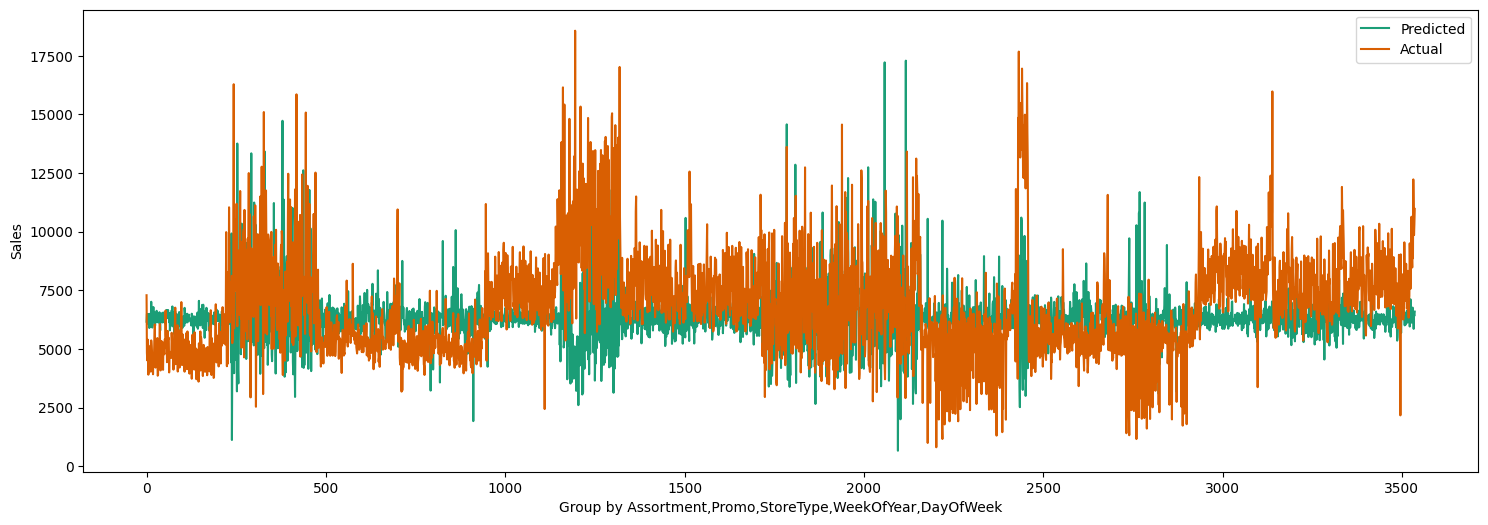

In [374]:
SalesPredictModels['y_pred_rdf'] = y_pred_rdf_test
xy = SalesPredictModels[['Promo','StoreType','Assortment','Sales_x','y_pred_rdf','WeekOfYear','DayOfWeek']].groupby(['Assortment','Promo','StoreType','WeekOfYear','DayOfWeek'],as_index = False).mean().reset_index()
plt.figure(figsize = (18,6))
sns.lineplot(x= 'index',y=10**xy['y_pred_rdf'], data=xy,errorbar=None)
sns.lineplot(x= 'index',y=10**xy['Sales_x'], data=xy,errorbar=None)
plt.legend(["Predicted","Actual"])
plt.ylabel('Sales')
plt.xlabel('Group by Assortment,Promo,StoreType,WeekOfYear,DayOfWeek')
plt.show()

### **Ridge Regression with Hyperparameter Tuning**

In [375]:
# train data with ridge regression and hyperparameter tuning
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-8,1e-5,1e-2,1e-1,1,2,3,5,10,20,30]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-08, 1e-05, 0.01, 0.1, 1, 2, 3, 5, 10, 20,
                                   30]},
             scoring='neg_mean_squared_error')

In [376]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -0.004443577437173246


In [377]:

# predict the train  data and  print the best parameter values and negative mean squared error
y_pred_ridge_train = ridge_regressor.predict(X_train)
MSE_train  = mean_squared_error(10**(y_train), 10**(y_pred_ridge_train))
RMSE_train = np.sqrt(MSE_train)
r2_train = r2_score(10**(y_train), 10**(y_pred_lasso_train))
Train_Adjusted_R2 = 1-(1-r2_score(10**(y_train), 10**(y_pred_lasso_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
#print best parameter coefficient
coefs = ridge_regressor.best_estimator_
print(f'Best parameter coefficients : {coefs.coef_}\n')

print('Training Data')
print(f'MSE : {MSE_train}')
print(f'RMSE : {RMSE_train}')
print(f'R2 : {r2_train}')
print(f'Adjusted R2 : {Train_Adjusted_R2}\n')

# predict the test  data and  print the best parameter values and negative mean squared error
y_pred_ridge_test = ridge_regressor.predict(X_test)
MSE_test  = mean_squared_error(10**(y_test), 10**(y_pred_ridge_test))
RMSE_test = np.sqrt(MSE_test)
r2_test = r2_score(10**(y_test), 10**(y_pred_lasso_test))
Test_Adjusted_R2 = 1-(1-r2_score(10**(y_test), 10**(y_pred_lasso_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Testing Data')
print(f'MSE : {MSE_test}')
print(f'RMSE : {RMSE_test}')
print(f'R2 : {r2_test}')
print(f'Adjusted R2 : {Test_Adjusted_R2}\n')

Best parameter coefficients : [ 0.02634909  0.01593919 -0.00058993  0.168933    0.03041484  0.0008283
  0.00044142  0.00287192 -0.01171166 -0.0128363  -0.01187002  0.024664
 -0.00176397 -0.01730177  0.00481114]

Training Data
MSE : 1214485.7340565342
RMSE : 1102.0370837937053
R2 : 0.8450258325213247
Adjusted R2 : 0.8450223276928831

Testing Data
MSE : 1217348.44564483
RMSE : 1103.3351465646465
R2 : 0.8449788797597393
Adjusted R2 : 0.8449648551835639



In [378]:
model_accuracy.loc[len(model_accuracy.index)] = ['Ridge_Regression',MSE_train,RMSE_train,r2_train,Train_Adjusted_R2,MSE_test,RMSE_test,r2_test,Test_Adjusted_R2]

Text(7.100597222222222, 0.5, 'Density')

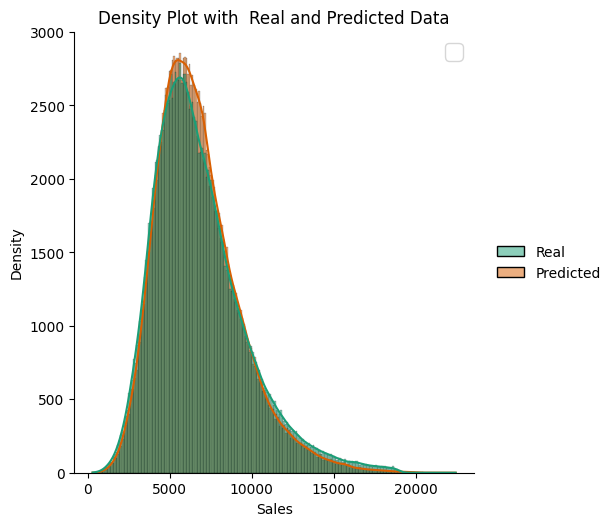

In [379]:
 # Draw the density plot
ab = {'Real':10**(np.array(y_test)),'Predicted' :10**(y_pred_ridge_test)}
sns.displot(ab,kde = True)

# Plot formatting
plt.legend(prop={'size': 16})
plt.title('Density Plot with  Real and Predicted Data')
plt.xlabel('Sales')
plt.ylabel('Density')

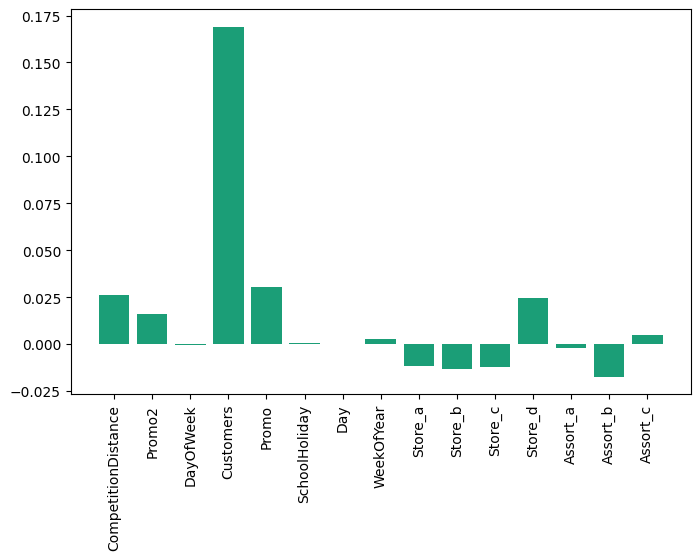

In [380]:
# linear regression feature importance
# get importance
importance = coefs.coef_

# plot feature importance
ax = plt.bar([x for x in range(len(importance))], importance)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], feat,rotation=90)
plt.show()

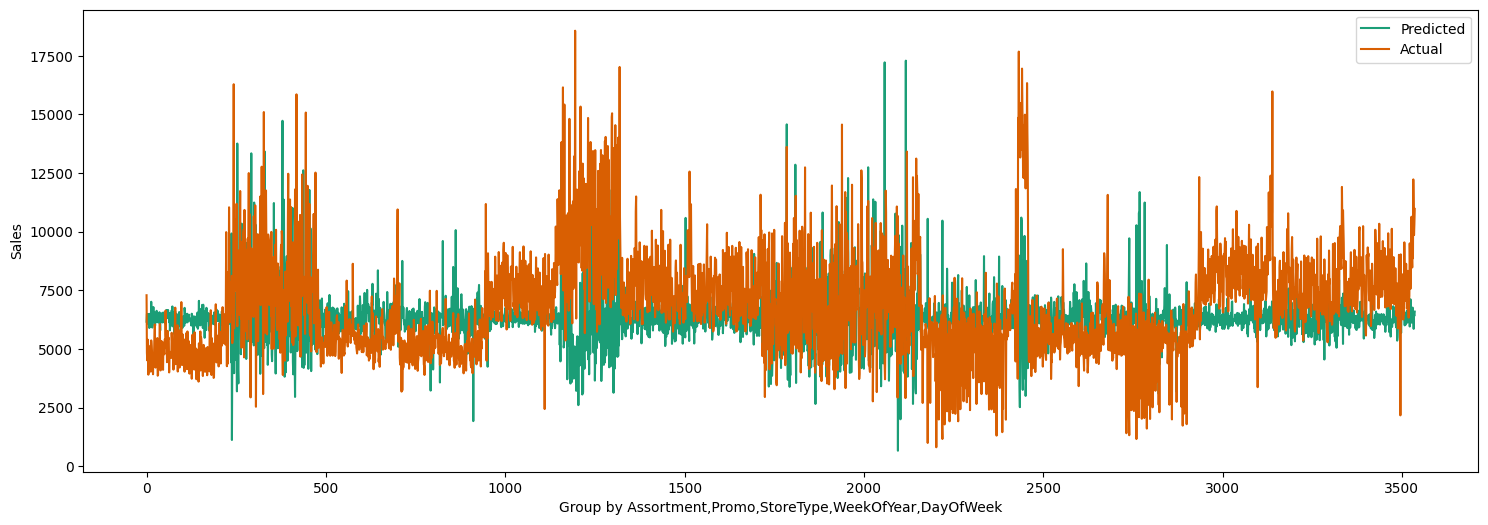

In [381]:
SalesPredictModels['y_pred_rdf'] = y_pred_rdf_test
xy = SalesPredictModels[['Promo','StoreType','Assortment','Sales_x','y_pred_rdf','WeekOfYear','DayOfWeek']].groupby(['Assortment','Promo','StoreType','WeekOfYear','DayOfWeek'],as_index = False).mean().reset_index()
plt.figure(figsize = (18,6))
sns.lineplot(x= 'index',y=10**xy['y_pred_rdf'], data=xy,errorbar=None)
sns.lineplot(x= 'index',y=10**xy['Sales_x'], data=xy,errorbar=None)
plt.legend(["Predicted","Actual"])
plt.ylabel('Sales')
plt.xlabel('Group by Assortment,Promo,StoreType,WeekOfYear,DayOfWeek')
plt.show()

### **Elastic Net Regression with Hyperparameter Tuning**

In [382]:
# train data with Elastic Net regression
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
parameters = {'alpha': [1e-8,1e-5,1e-2,1e-1,1,2,3,5,10,20,30],'l1_ratio':[0.3,0.5,0.7,0.75,0.8,0.9]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-08, 1e-05, 0.01, 0.1, 1, 2, 3, 5, 10, 20,
                                   30],
                         'l1_ratio': [0.3, 0.5, 0.7, 0.75, 0.8, 0.9]},
             scoring='neg_mean_squared_error')

In [383]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-08, 'l1_ratio': 0.8}

Using  {'alpha': 1e-08, 'l1_ratio': 0.8}  the negative mean squared error is:  -0.004443577437117305


In [384]:
# predict the train  data and  print the best parameter values and negative mean squared error

y_pred_elastic_train = elastic_regressor.predict(X_train)
MSE_train  = mean_squared_error(10**(y_train), 10**(y_pred_elastic_train))
RMSE_train = np.sqrt(MSE_train)
r2_train = r2_score(10**(y_train), 10**(y_pred_elastic_train))
Train_Adjusted_R2 = 1-(1-r2_score(10**(y_train), 10**(y_pred_elastic_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))

#predict the bestparameter coefficient
print(f'Best parameter coefficients : {coefs.coef_}\n')
coefs = elastic_regressor.best_estimator_

print('Training Data')
print(f'MSE : {MSE_train}')
print(f'RMSE : {RMSE_train}')
print(f'R2 : {r2_train}')
print(f'Adjusted R2 : {Train_Adjusted_R2}\n')

# predict the test  data and  print the best parameter values and negative mean squared error
y_pred_elastic_test = elastic_regressor.predict(X_test)
MSE_test  = mean_squared_error(10**(y_test), 10**(y_pred_elastic_test))
RMSE_test = np.sqrt(MSE_test)
r2_test = r2_score(10**(y_test), 10**(y_pred_elastic_test))
Test_Adjusted_R2 = 1-(1-r2_score(10**(y_test), 10**(y_pred_elastic_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Testing Data')
print(f'MSE : {MSE_test}')
print(f'RMSE : {RMSE_test}')
print(f'R2 : {r2_test}')
print(f'Adjusted R2 : {Test_Adjusted_R2}\n')

Best parameter coefficients : [ 0.02634909  0.01593919 -0.00058993  0.168933    0.03041484  0.0008283
  0.00044142  0.00287192 -0.01171166 -0.0128363  -0.01187002  0.024664
 -0.00176397 -0.01730177  0.00481114]

Training Data
MSE : 1214485.4374126086
RMSE : 1102.0369492047935
R2 : 0.8450258335210927
Adjusted R2 : 0.8450223286926737

Testing Data
MSE : 1217348.083041301
RMSE : 1103.3349822430635
R2 : 0.8449788807817457
Adjusted R2 : 0.8449648562056628



In [385]:
model_accuracy.loc[len(model_accuracy.index)] = ['Elastic_Net_Regression',MSE_train,RMSE_train,r2_train,Train_Adjusted_R2,MSE_test,RMSE_test,r2_test,Test_Adjusted_R2]

Text(7.100597222222222, 0.5, 'Density')

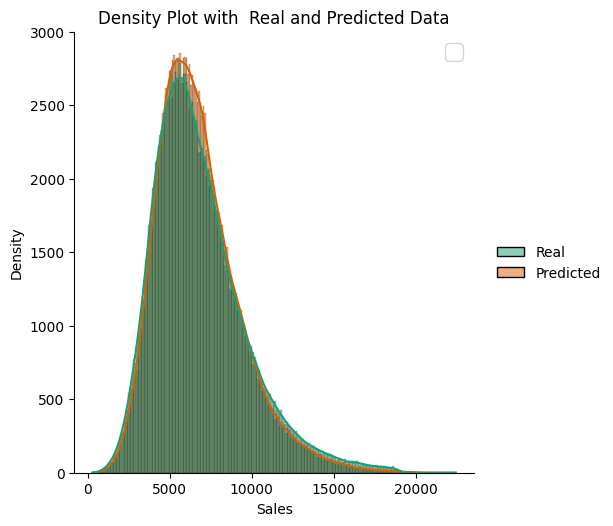

In [386]:
 # Draw the density plot
ab = {'Real':10**(np.array(y_test)),'Predicted' :10**(y_pred_elastic_test)}
sns.displot(ab,kde = True)

# Plot formatting
plt.legend(prop={'size': 16})
plt.title('Density Plot with  Real and Predicted Data')
plt.xlabel('Sales')
plt.ylabel('Density')

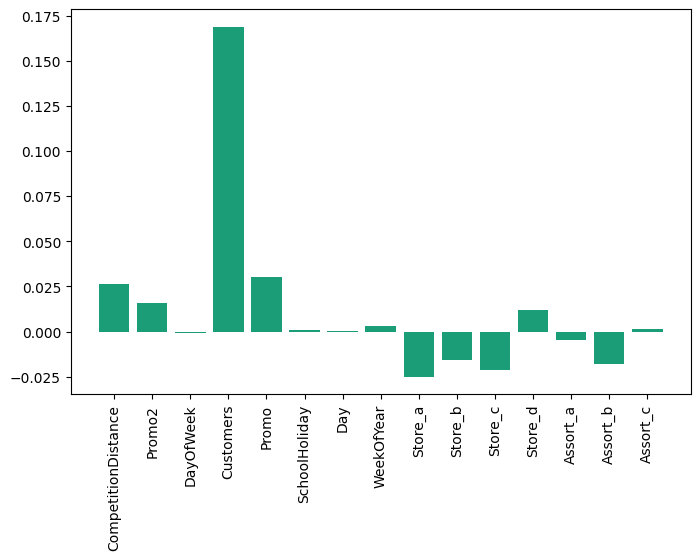

In [387]:
# linear regression feature importance
# get importance
importance = coefs.coef_

# plot feature importance
ax = plt.bar([x for x in range(len(importance))], importance)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], feat,rotation=90)
plt.show()

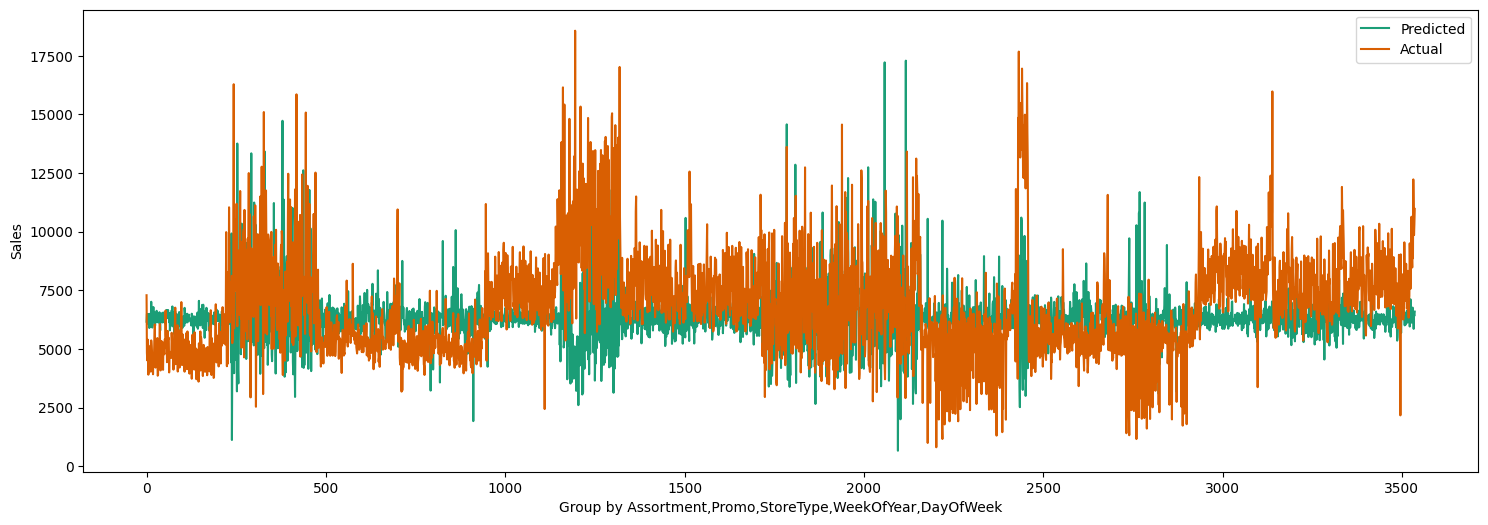

In [388]:
SalesPredictModels['y_pred_rdf'] = y_pred_rdf_test
xy = SalesPredictModels[['Promo','StoreType','Assortment','Sales_x','y_pred_rdf','WeekOfYear','DayOfWeek']].groupby(['Assortment','Promo','StoreType','WeekOfYear','DayOfWeek'],as_index = False).mean().reset_index()
plt.figure(figsize = (18,6))
sns.lineplot(x= 'index',y=10**xy['y_pred_rdf'], data=xy,errorbar=None)
sns.lineplot(x= 'index',y=10**xy['Sales_x'], data=xy,errorbar=None)
plt.legend(["Predicted","Actual"])
plt.ylabel('Sales')
plt.xlabel('Group by Assortment,Promo,StoreType,WeekOfYear,DayOfWeek')
plt.show()

### **Decison Tree Regression with Hyerparameter Tuning**

In [389]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
# train data with decision tree regression
decision_tree = DecisionTreeRegressor()
parameters = {'max_depth': [5, 10, None],
              'min_samples_leaf': [1, 2, 5],
              'min_samples_split': [2, 5, 10],
              'max_leaf_nodes': [5, 20, 100],
              }

# RandomizedSearchCV is used for hyperparameter tuning because DecisionTreeRegressor() have multiple hyperparameters
# cv=3 & n_iter=10 since dataset is large
dt_reg = RandomizedSearchCV(estimator=decision_tree, param_distributions=parameters, n_iter=15, cv=3)
dt_reg.fit(X_train, y_train)


RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_iter=15,
                   param_distributions={'max_depth': [5, 10, None],
                                        'max_leaf_nodes': [5, 20, 100],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5, 10]})

In [390]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",dt_reg.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-08, 'l1_ratio': 0.8}

Using  {'min_samples_split': 5, 'min_samples_leaf': 5, 'max_leaf_nodes': 100, 'max_depth': 10}  the negative mean squared error is:  -0.004443577437117305


In [391]:
# predict the train  data and  print the best parameter values and negative mean squared error
y_pred_tree_train = dt_reg.predict(X_train)
MSE_train  = mean_squared_error(10**(y_train), 10**(y_pred_tree_train))
RMSE_train = np.sqrt(MSE_train)
r2_train = r2_score(10**(y_train), 10**(y_pred_tree_train))
Train_Adjusted_R2 = 1-(1-r2_score(10**(y_train), 10**(y_pred_tree_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print('Training Data')
print(f'MSE : {MSE_train}')
print(f'RMSE : {RMSE_train}')
print(f'R2 : {r2_train}')
print(f'Adjusted R2 : {Train_Adjusted_R2}\n')

# predict the test  data and  print the best parameter values and negative mean squared error
y_pred_tree_test = dt_reg.predict(X_test)
MSE_test  = mean_squared_error(10**(y_test), 10**(y_pred_tree_test))
RMSE_test = np.sqrt(MSE_test)
r2_test = r2_score(10**(y_test), 10**(y_pred_tree_test))
Test_Adjusted_R2 = 1-(1-r2_score(10**(y_test), 10**(y_pred_tree_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Testing Data')
print(f'MSE : {MSE_test}')
print(f'RMSE : {RMSE_test}')
print(f'R2 : {r2_test}')
print(f'Adjusted R2 : {Test_Adjusted_R2}\n')

Training Data
MSE : 1362363.609947965
RMSE : 1167.2033284513736
R2 : 0.8261558694827301
Adjusted R2 : 0.8261519378994027

Testing Data
MSE : 1367349.403001068
RMSE : 1169.3371639527531
R2 : 0.8258772180541184
Adjusted R2 : 0.8258614653733516



In [392]:
model_accuracy.loc[len(model_accuracy.index)] = ['Decsion_Tree_Regression',MSE_train,RMSE_train,r2_train,Train_Adjusted_R2,MSE_test,RMSE_test,r2_test,Test_Adjusted_R2]

Text(7.100597222222222, 0.5, 'Density')

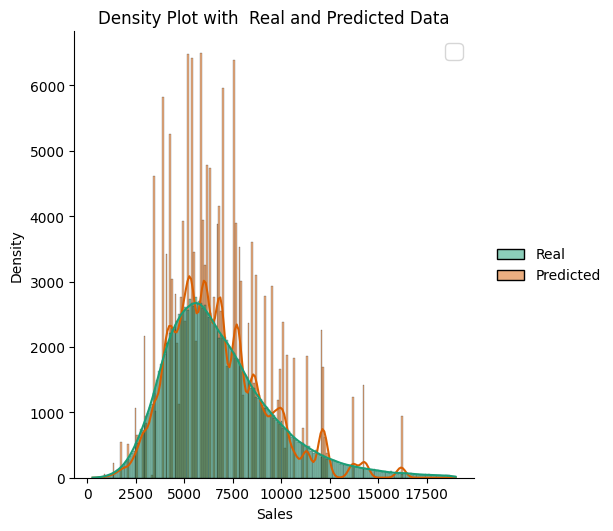

In [393]:
 # Draw the density plot
ab = {'Real':10**(np.array(y_test)),'Predicted' :10**(y_pred_tree_test)}
sns.displot(ab,kde = True)
# Plot formatting
plt.legend(prop={'size': 16})
plt.title('Density Plot with  Real and Predicted Data')
plt.xlabel('Sales')
plt.ylabel('Density')

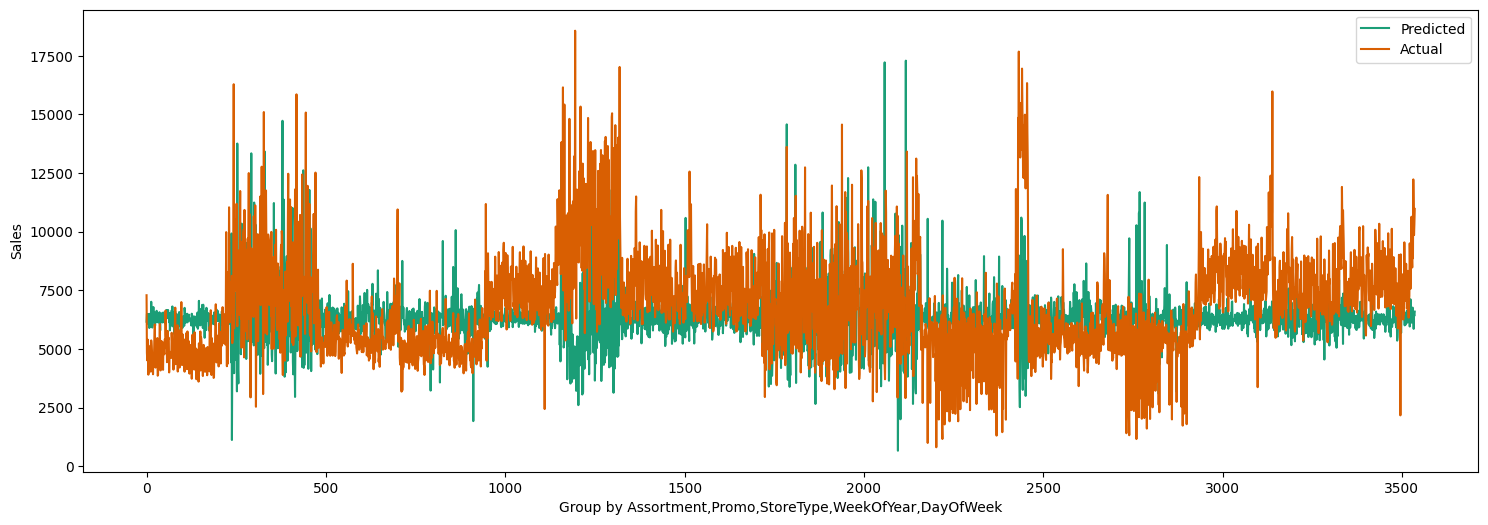

In [394]:
SalesPredictModels['y_pred_rdf'] = y_pred_rdf_test
xy = SalesPredictModels[['Promo','StoreType','Assortment','Sales_x','y_pred_rdf','WeekOfYear','DayOfWeek']].groupby(['Assortment','Promo','StoreType','WeekOfYear','DayOfWeek'],as_index = False).mean().reset_index()
plt.figure(figsize = (18,6))
sns.lineplot(x= 'index',y=10**xy['y_pred_rdf'], data=xy,errorbar=None)
sns.lineplot(x= 'index',y=10**xy['Sales_x'], data=xy,errorbar=None)
plt.legend(["Predicted","Actual"])
plt.ylabel('Sales')
plt.xlabel('Group by Assortment,Promo,StoreType,WeekOfYear,DayOfWeek')
plt.show()

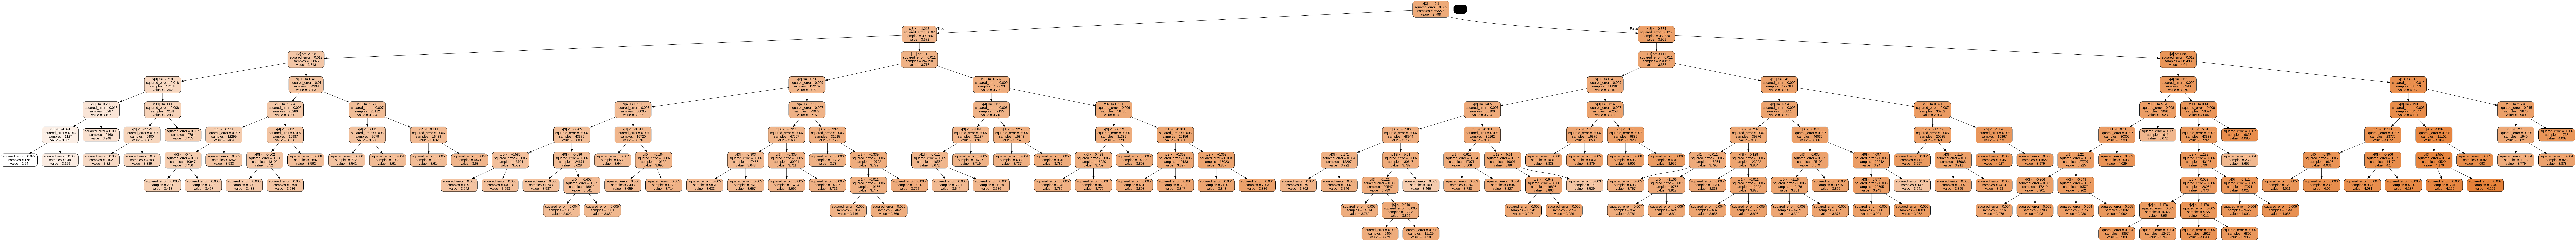

In [395]:
from sklearn import tree
from IPython.display import Image
import pydotplus
decision_tree = DecisionTreeRegressor(min_samples_split = 5, min_samples_leaf = 1, max_leaf_nodes = 100, max_depth = None)
dtre = decision_tree.fit(X_train, y_train)
dot_data = tree.export_graphviz(dtre, out_file=None,
                                rounded=True,
                                filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [396]:
# train data with random forest regression
from sklearn.ensemble import RandomForestRegressor
rdf = RandomForestRegressor(n_estimators=15)
rdf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=15)

In [397]:

# predict the train  data and  print the best parameter values and negative mean squared error
y_pred_rdf_train = rdf.predict(X_train)
MSE_train  = mean_squared_error(10**(y_train), 10**(y_pred_rdf_train))
RMSE_train = np.sqrt(MSE_train)
r2_train = r2_score(10**(y_train), 10**(y_pred_rdf_train))
Train_Adjusted_R2 = 1-(1-r2_score(10**(y_train), 10**(y_pred_rdf_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print('Training Data')
print(f'MSE : {MSE_train}')
print(f'RMSE : {RMSE_train}')
print(f'R2 : {r2_train}')
print(f'Adjusted R2 : {Train_Adjusted_R2}\n')

# predict the test  data and  print the best parameter values and negative mean squared error
y_pred_rdf_test = rdf.predict(X_test)
MSE_test  = mean_squared_error(10**(y_test), 10**(y_pred_rdf_test))
RMSE_test = np.sqrt(MSE_test)
r2_test = r2_score(10**(y_test), 10**(y_pred_rdf_test))
Test_Adjusted_R2 = 1-(1-r2_score(10**(y_test), 10**(y_pred_rdf_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Testing Data')
print(f'MSE : {MSE_test}')
print(f'RMSE : {RMSE_test}')
print(f'R2 : {r2_test}')
print(f'Adjusted R2 : {Test_Adjusted_R2}\n')

Training Data
MSE : 55551.93206721547
RMSE : 235.69457369064625
R2 : 0.9929113070414819
Adjusted R2 : 0.9929111467266817

Testing Data
MSE : 315848.2080578014
RMSE : 562.0037438111968
R2 : 0.9597788476457154
Adjusted R2 : 0.9597752088859505



In [398]:
model_accuracy.loc[len(model_accuracy.index)] = ['Random_Forest_Regression',MSE_train,RMSE_train,r2_train,Train_Adjusted_R2,MSE_test,RMSE_test,r2_test,Test_Adjusted_R2]

Text(7.100597222222222, 0.5, 'Density')

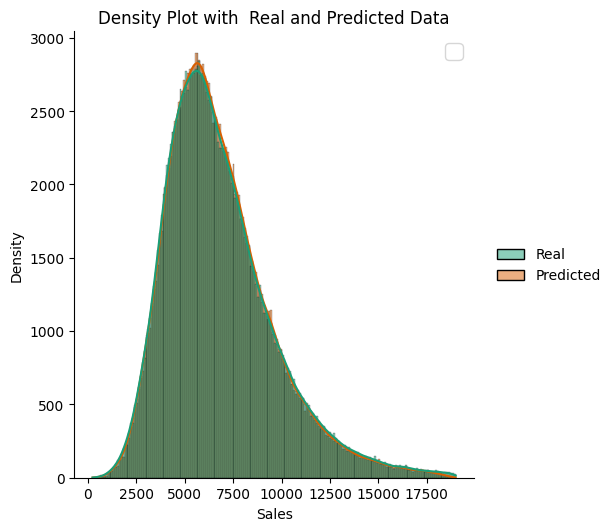

In [399]:
 # Draw the density plot
ab = {'Real':10**(np.array(y_test)),'Predicted' :10**(y_pred_rdf_test)}
sns.displot(ab,kde = True)

# Plot formatting
plt.legend(prop={'size': 16})
plt.title('Density Plot with  Real and Predicted Data')
plt.xlabel('Sales')
plt.ylabel('Density')

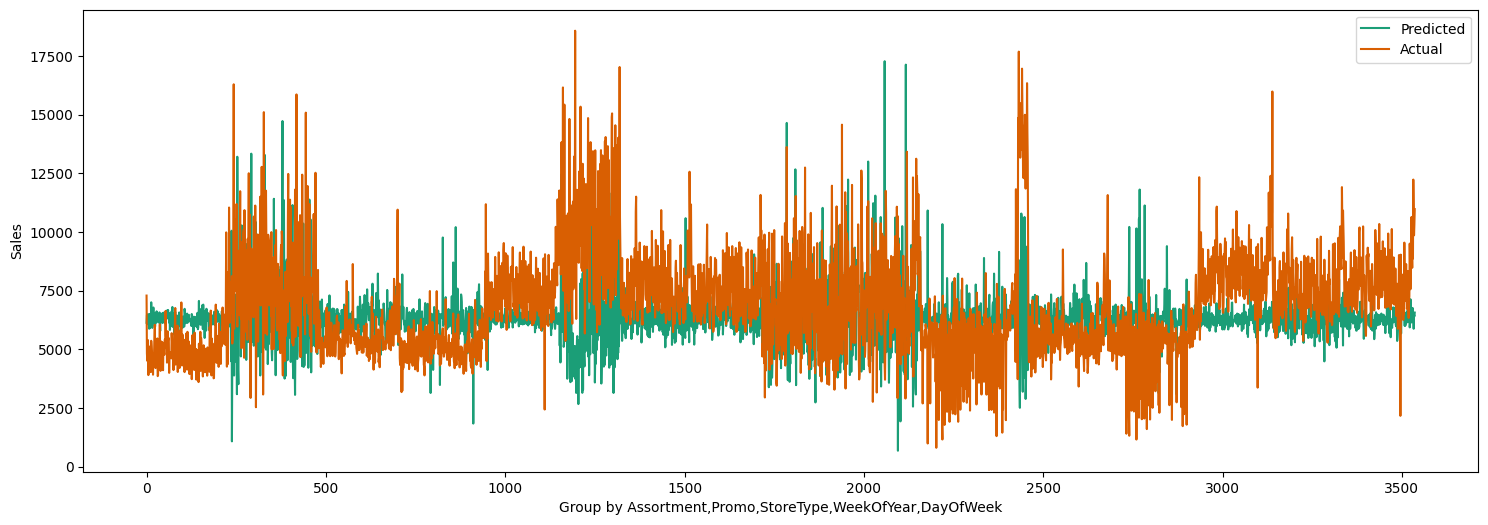

In [400]:
SalesPredictModels['y_pred_rdf'] = y_pred_rdf_test
xy = SalesPredictModels[['Promo','StoreType','Assortment','Sales_x','y_pred_rdf','WeekOfYear','DayOfWeek']].groupby(['Assortment','Promo','StoreType','WeekOfYear','DayOfWeek'],as_index = False).mean().reset_index()
plt.figure(figsize = (18,6))
sns.lineplot(x= 'index',y=10**xy['y_pred_rdf'], data=xy,errorbar=None)
sns.lineplot(x= 'index',y=10**xy['Sales_x'], data=xy,errorbar=None)
plt.legend(["Predicted","Actual"])
plt.ylabel('Sales')
plt.xlabel('Group by Assortment,Promo,StoreType,WeekOfYear,DayOfWeek')
plt.show()

### **Checking Models Accuracy**

In [278]:


model_accuracy

Regression_Model     Train_MSE   Train_RMSE  Train_R2  \
0         Linear_Regression  1.214859e+06  1102.206527  0.844978   
1          Lasso_Regression  1.214485e+06  1102.036953  0.845026   
2          Ridge_Regression  1.214486e+06  1102.037084  0.845026   
3    Elastic_Net_Regression  1.214485e+06  1102.036949  0.845026   
4   Decsion_Tree_Regression  1.362364e+06  1167.203328  0.826156   
5  Random_Forest_Regression  5.514857e+04   234.837327  0.992963   
6          Ridge_Regression  1.214486e+06  1102.037084  0.845026   
7    Elastic_Net_Regression  1.214485e+06  1102.036949  0.845026   
8   Decsion_Tree_Regression  1.362364e+06  1167.203328  0.826156   
9  Random_Forest_Regression  5.531257e+04   235.186245  0.992942   

   Train_Adjusted_R2      Test_MSE    Test_RMSE   Test_R2  Test_Adjusted_R2  
0           0.844975  1.217627e+06  1103.461202  0.844943          0.844929  
1           0.845012  1.217348e+06  1103.334986  0.844979          0.844965  
2           0.845022  1.217348e+06  1103.335147  0.844979          0.844965  
3           0.845022  1.217348e+06  1103.334982  0.844979          0.844965  
4           0.826152  1.367349e+06  1169.337164  0.825877          0.825861  
5           0.992963  3.161330e+05   562.257024  0.959743          0.959739  
6           0.845022  1.217348e+06  1103.335147  0.844979          0.844965  
7           0.845022  1.217348e+06  1103.334982  0.844979          0.844965  
8           0.826152  1.367349e+06  1169.337164  0.825877          0.825861  
9           0.992942  3.166214e+05   562.691237  0.959680          0.959677

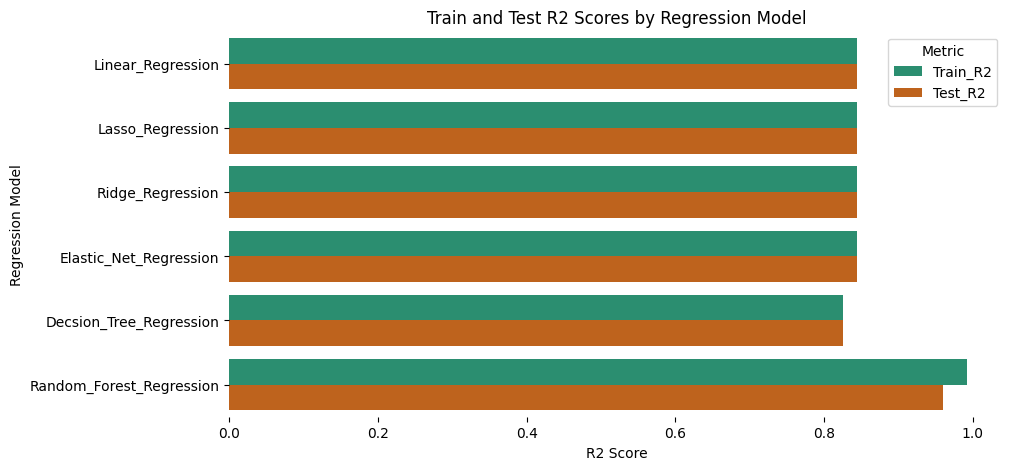

In [279]:
# Reshape the DataFrame to have separate columns for Train and Test, and use 'melt' to create a long-form DataFrame
df_long = pd.melt(model_accuracy[['Regression_Model','Train_R2','Test_R2']], id_vars='Regression_Model', var_name='Metric', value_name='R2 Score')

# Set the color palette
sns.set_palette("Dark2")

# Create the parallel bar plot with hue
plt.figure(figsize=(10, 5))
sns.barplot(x='R2 Score', y='Regression_Model', hue='Metric', data=df_long)

plt.xlabel('R2 Score')
plt.ylabel('Regression Model')
plt.title('Train and Test R2 Scores by Regression Model')
sns.despine(left=True, bottom=True)
plt.show()


# **Conclusion**
### **Conclusions from EDA**
<ol type = '1'>
<li>Mondays have most sales since most of the Sundays are closed.</li>
<li>Promotions seem to have a significant effect on sales but not for the number of customers.</li>
<li>Despite school holidays comprising only 19% of the total data points, the average sales during</br> school holidays surpass those during no holidays.</li>
<li>Promo1 does not have significant role on sales</li>
<li>It is advisable to spend more on promos to get higher returns.</li>
<li>Store type b has higher sales and customers per store than other store types.More Store </br>type b must be opened.</li>
<li>Assortment b is available only at store type b and it has more sales and customers than </br>any other assortment.</li>
<li>More assortment b must be stocked to meet the demands of customers.</li>
<li>Weekly sales and customers peak at the mid-December.It may be guessed that people buy </br>drugs in advance just before the shops close for the holiday season.</li>
<li>In cases where there is less competition distance, it appears that sales values tend to be higher.</br> This might be attributed to the possibility that in areas with higher demand, multiple stores are</br> situated.</li>
<li>Sales are highest during december,this is because of christmas and in this month harshest winter</br> start in Europe so more people become sick. </li>
</ol>

### **Conclusions from Modelling**
<ol type = '1'>
<li>The linear regression  model is least accurate as it has very high coefficient of Assortment categories </br>and Store type categories and it neglected features like customers,promotions which has positive</br> correlation with sales,so we have use hyperparameter tuning to impose penalties on coefficients.</li>
<li>Decision Tree Model  density distribution plot of sales varies highly with real data of sales.</li>
<li>Random Forest Regression has 99% accuracy for train data but 96% for test data, so this type of</br> model cant be trusted,as the difference between train
-test is very high</li>
<li>The most accurate models are Ridge,Lasso and Elastic-Net Regression,there train-test performances are</br> almost similar and coefficient's are also similar.</li>
<li>The week of year lineplot shows that Predicted Sales follows  Actual Sales,with varaition of mostly 700 </br>dollars,except for last 2 week of the year</li>
</ol>